In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
from torch import optim

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
num_time_steps = 50
input_size = 1
hidden_size = 16
output_size = 1
lr = 0.01
iterations = 6000

In [3]:
class RnnNet(nn.Module):
    def __init__(self):
        super(RnnNet,self).__init__()
        self.rnn = nn.RNN(
            input_size = input_size,
            hidden_size = hidden_size,
            num_layers = 1,
            batch_first = True,
        )
        self.linear = nn.Linear(hidden_size,output_size)
        
    def forward(self,x,hidden_prev):
        out,hidden_prev = self.rnn(x,hidden_prev)
        out =  out.view(-1,hidden_size)
        out = self.linear(out)
        out = out.unsqueeze(dim = 0)
        return out,hidden_prev

In [4]:
%%time
model = RnnNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr = lr)

hidden_prev = torch.zeros(1,1,hidden_size)

for iter in range(iterations):
    start = np.random.randint(3,size = 1)[0]
    time_steps = np.linspace(start,start + 10,num_time_steps)
    data = np.sin(time_steps)
    data = data.reshape(num_time_steps,1)
    x = torch.tensor(data[:-1]).float().view(1,num_time_steps - 1,1)
    y = torch.tensor(data[1:]).float().view(1,num_time_steps - 1,1)
    
    output,hidden_prev = model(x,hidden_prev)
    hidden_prev = hidden_prev.detach()
    
    loss = criterion(output,y)
    model.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    if iter % 100 == 0:
        print(f"Iteration: {iter} loss: {loss.item()}")

Iteration: 0 loss: 0.4177051782608032
Iteration: 100 loss: 0.010332126170396805
Iteration: 200 loss: 0.006544941104948521
Iteration: 300 loss: 0.00024518213467672467
Iteration: 400 loss: 0.0011906120926141739
Iteration: 500 loss: 0.0020077743101865053
Iteration: 600 loss: 0.0011049212189391255
Iteration: 700 loss: 0.0021954274270683527
Iteration: 800 loss: 0.00010825842036865652
Iteration: 900 loss: 0.0006189520936459303
Iteration: 1000 loss: 0.0003595827438402921
Iteration: 1100 loss: 8.295134466607124e-05
Iteration: 1200 loss: 0.0006814864464104176
Iteration: 1300 loss: 0.0023173834197223186
Iteration: 1400 loss: 0.0004689404449891299
Iteration: 1500 loss: 0.0007316542323678732
Iteration: 1600 loss: 0.00022571998124476522
Iteration: 1700 loss: 0.001412237761542201
Iteration: 1800 loss: 0.0002881275722756982
Iteration: 1900 loss: 0.00029745438951067626
Iteration: 2000 loss: 0.00047559174709022045
Iteration: 2100 loss: 0.0009395718807354569
Iteration: 2200 loss: 0.0008375242468900979
I

In [5]:
predictions = []
input =  x[:,0,:]
for _ in range(x.shape[1]):
    input = input.view(1,1,1)
    (pred,hidden_prev) = model(input,hidden_prev)
    input = pred
    predictions.append(pred.detach().numpy().ravel()[0])

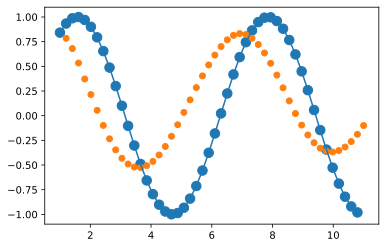

In [6]:
x = x.data.numpy().ravel()
y = y.data.numpy()
plt.scatter(time_steps[:-1], x.ravel(), s=90)
plt.plot(time_steps[:-1], x.ravel())

plt.scatter(time_steps[1:], predictions)
plt.show()